<a href="https://colab.research.google.com/github/AlekseevaTatiana23/AI/blob/main/!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Загрузка и первичный анализ данных
data = pd.read_csv("diabetes_prediction_dataset.csv")  # ваш файл


In [ ]:
# Проверка и удаление дубликатов
initial_rows = len(data)
data.drop_duplicates(inplace=True)
final_rows = len(data)
if initial_rows != final_rows:
    print(f"Удалено дубликатов: {initial_rows - final_rows}")
else:
    print("Дубликаты не найдены.")

print("Первые строки данных:\n", data.head())

Удалено дубликатов: 3854
Первые строки данных:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
# Обработка пропусков
# Для числовых признаков — медиана
numeric_cols = [
    "age", "bmi", "HbA1c_level", "blood_glucose_level"
]
for col in numeric_cols:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        print(f"Заполнены пропуски в '{col}' медианой: {median_value}")

# Для категориальных — мода
categorical_cols = [
    "gender", "hypertension", "heart_disease", "smoking_history", "diabetes"
]
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
        print(f"Заполнены пропуски в '{col}' модой: {mode_value}")


In [ ]:
# Обнаружение и удаление выбросов (IQR)
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = len(df)
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        after = len(df)
        print(f"{feature}: удалено выбросов: {before - after}")
    return df

data = remove_outliers(data, numeric_cols)


age: удалено выбросов: 0
bmi: удалено выбросов: 5354
HbA1c_level: удалено выбросов: 1145
blood_glucose_level: удалено выбросов: 1452


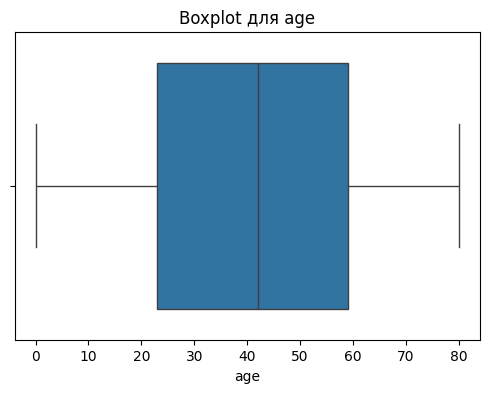

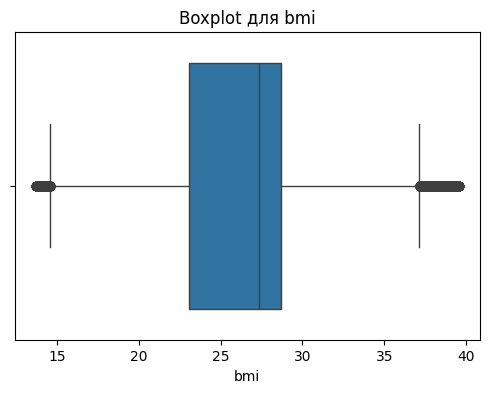

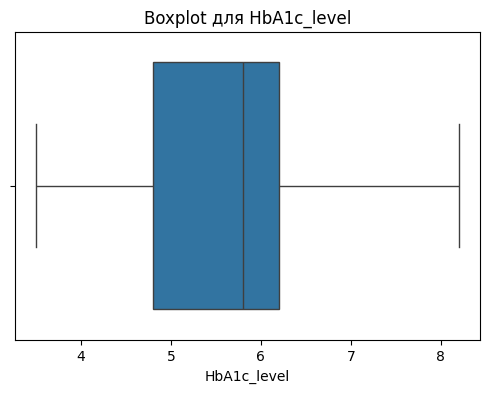

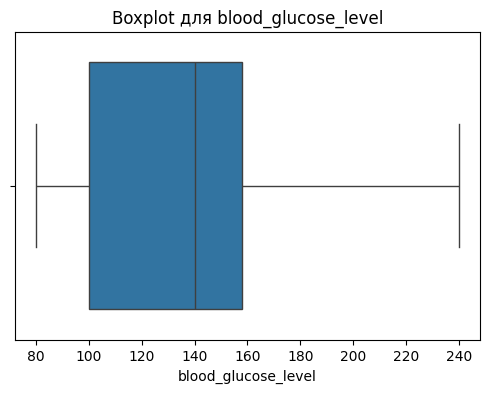

In [ ]:
# Визуализация boxplot для числовых признаков
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot для {col}")
    plt.show()

In [ ]:
# Описательная статистика
print("Описание числовых признаков:\n", data.describe())

Описание числовых признаков:
                 age  hypertension  heart_disease           bmi   HbA1c_level  \
count  88195.000000  88195.000000   88195.000000  88195.000000  88195.000000   
mean      41.070108      0.068451       0.036873     26.314620      5.459188   
std       22.590849      0.252519       0.188451      5.218361      0.995330   
min        0.080000      0.000000       0.000000     13.710000      3.500000   
25%       23.000000      0.000000       0.000000     23.050000      4.800000   
50%       42.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     28.690000      6.200000   
max       80.000000      1.000000       1.000000     39.550000      8.200000   

       blood_glucose_level      diabetes  
count         88195.000000  88195.000000  
mean            134.630126      0.052361  
std              35.255872      0.222756  
min              80.000000      0.000000  
25%             100.000000      0.

In [ ]:
# Преобразование категориальных признаков
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    print(f"Кодировка '{col}': {list(le.classes_)}")


Кодировка 'gender': ['Female', 'Male', 'Other']
Кодировка 'hypertension': [np.int64(0), np.int64(1)]
Кодировка 'heart_disease': [np.int64(0), np.int64(1)]
Кодировка 'smoking_history': ['No Info', 'current', 'ever', 'former', 'never', 'not current']
Кодировка 'diabetes': [np.int64(0), np.int64(1)]


In [ ]:
print(data.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
# Масштабирование числовых признаков
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


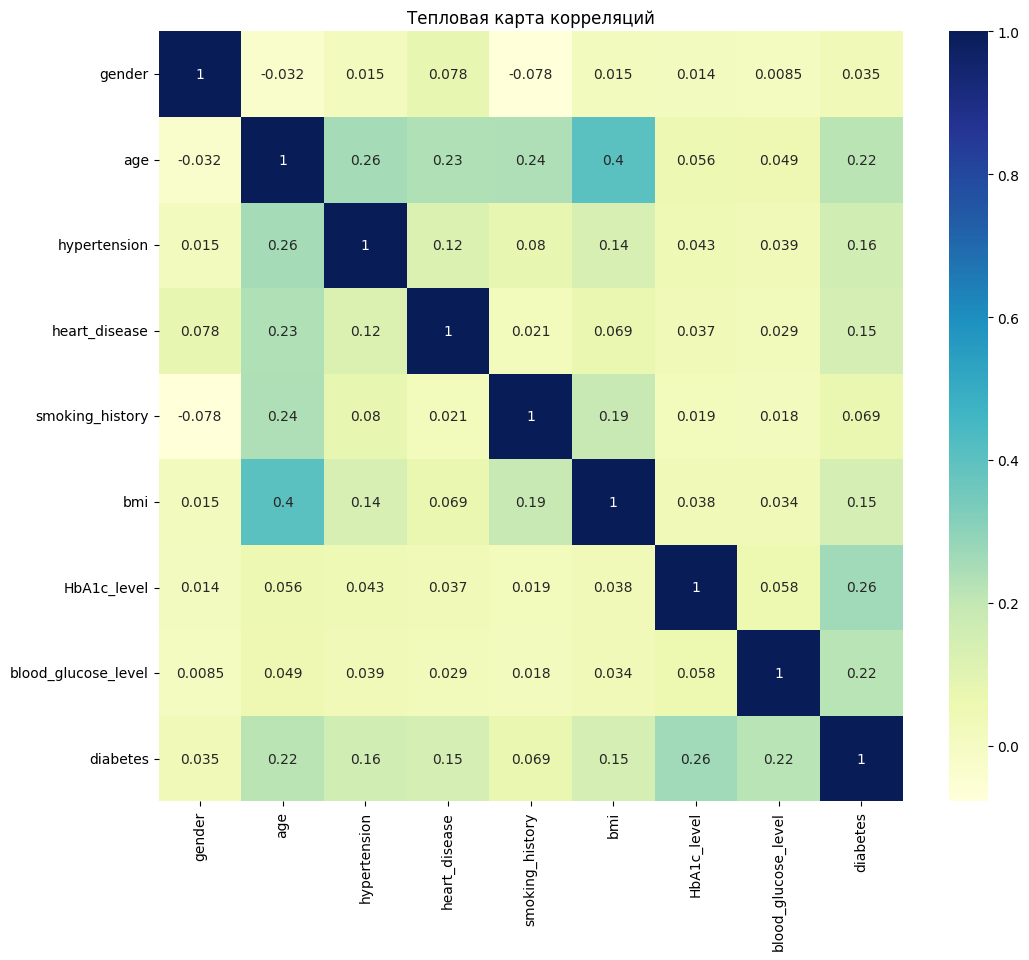

In [ ]:
# Визуализация корреляционной матрицы
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Тепловая карта корреляций')
plt.show()


In [ ]:
# Анализ корреляций (по абсолютному значению > 0.15)
threshold = 0.15
significant_corr = corr[(corr.abs() > threshold) & (corr.abs() < 1)]
print("Значимые корреляции:\n", significant_corr)


Значимые корреляции:
                      gender       age  hypertension  heart_disease  \
gender                  NaN       NaN           NaN            NaN   
age                     NaN       NaN      0.255928       0.234206   
hypertension            NaN  0.255928           NaN            NaN   
heart_disease           NaN  0.234206           NaN            NaN   
smoking_history         NaN  0.238547           NaN            NaN   
bmi                     NaN  0.404966           NaN            NaN   
HbA1c_level             NaN       NaN           NaN            NaN   
blood_glucose_level     NaN       NaN           NaN            NaN   
diabetes                NaN  0.215886      0.161844            NaN   

                     smoking_history       bmi  HbA1c_level  \
gender                           NaN       NaN          NaN   
age                         0.238547  0.404966          NaN   
hypertension                     NaN       NaN          NaN   
heart_disease            


Анализ взаимосвязи с hypertension:

Перекрестная таблица gender и hypertension:
hypertension      0     1
gender                   
0             47845  3334
1             34295  2703
2                18     0
χ² статистика: 22.4157, p-значение: 0.0000
Статистически значимая связь (p < 0.05)

Перекрестная таблица heart_disease и hypertension:
hypertension       0     1
heart_disease             
0              79642  5301
1               2516   736
χ² статистика: 1317.1823, p-значение: 0.0000
Статистически значимая связь (p < 0.05)

Перекрестная таблица smoking_history и hypertension:
hypertension         0     1
smoking_history             
0                30103  1008
1                 7654   695
2                 3239   350
3                 7070  1063
4                28702  2547
5                 5390   374
χ² статистика: 1289.2664, p-значение: 0.0000
Статистически значимая связь (p < 0.05)


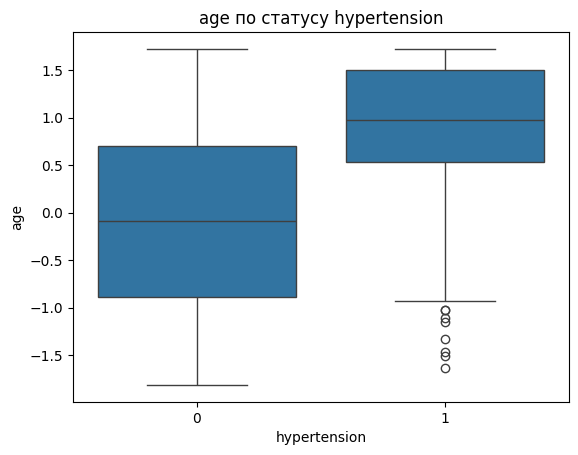

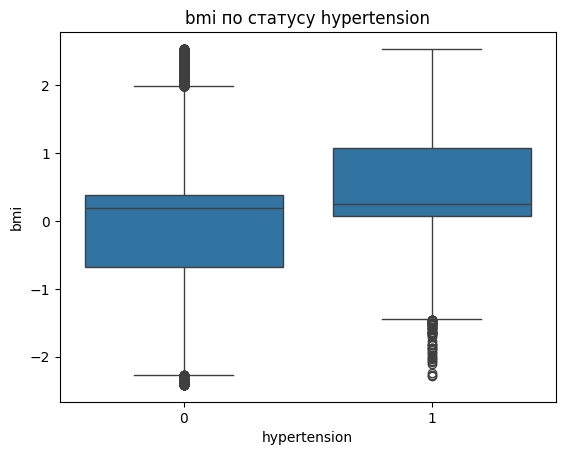

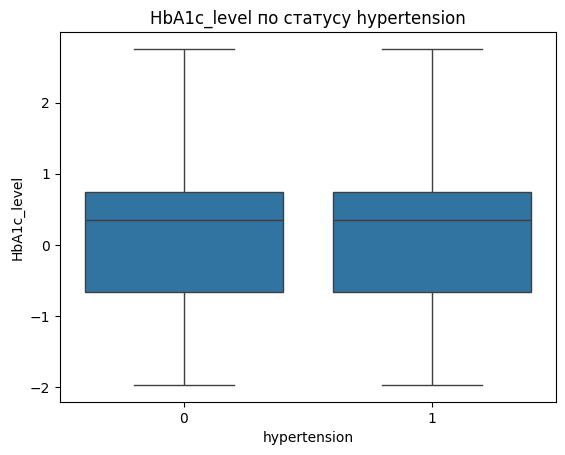

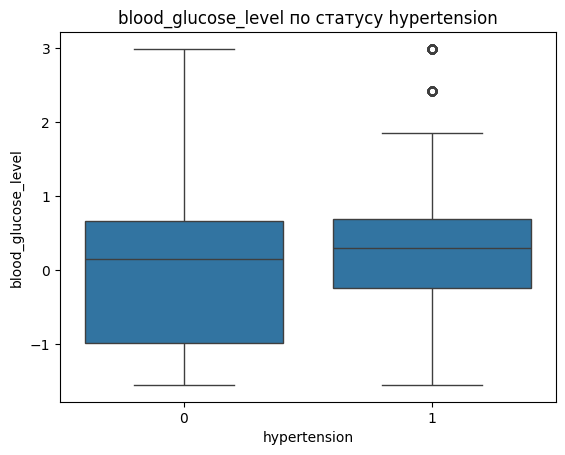


Анализ взаимосвязи с diabetes:

Перекрестная таблица gender и diabetes:
diabetes      0     1
gender               
0         48842  2337
1         34717  2281
2            18     0
χ² статистика: 111.6290, p-значение: 0.0000
Статистически значимая связь (p < 0.05)

Перекрестная таблица heart_disease и diabetes:
diabetes           0     1
heart_disease             
0              81035  3908
1               2542   710
χ² статистика: 1870.8847, p-значение: 0.0000
Статистически значимая связь (p < 0.05)

Перекрестная таблица smoking_history и diabetes:
diabetes             0     1
smoking_history             
0                30310   801
1                 7845   504
2                 3327   262
3                 7244   889
4                29441  1808
5                 5410   354
χ² статистика: 1045.8060, p-значение: 0.0000
Статистически значимая связь (p < 0.05)


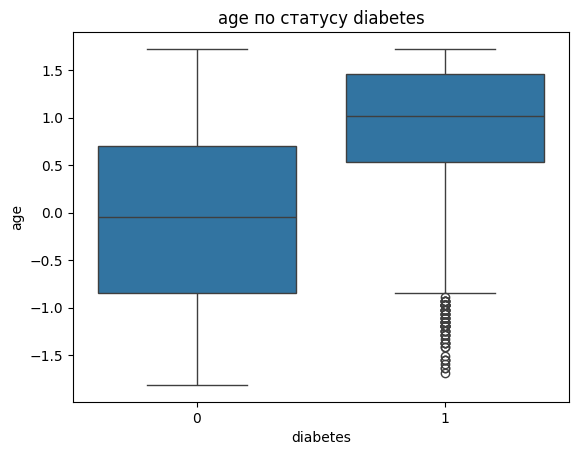

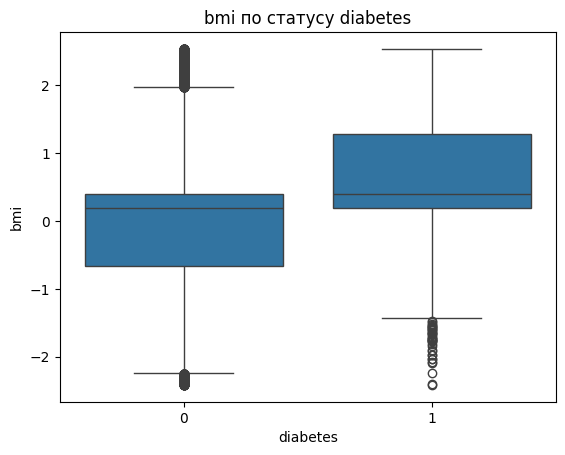

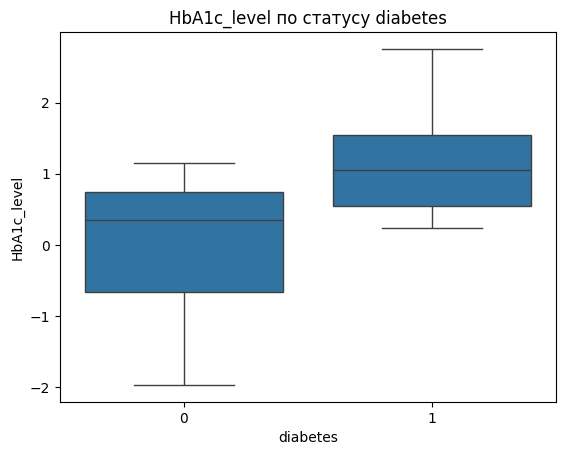

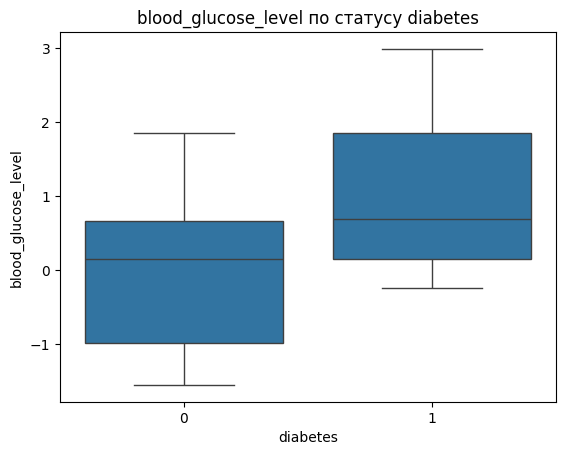

In [ ]:
# Анализ взаимосвязи заболеваний с признаками
# Перекрестные таблицы и χ² тесты для категориальных признаков
for disease in ['hypertension', 'diabetes']:
    print(f"\nАнализ взаимосвязи с {disease}:")
    for feature in ['gender', 'heart_disease', 'smoking_history']:
        ct = pd.crosstab(data[feature], data[disease])
        print(f"\nПерекрестная таблица {feature} и {disease}:\n{ct}")

        # Проведение χ² теста
        chi2, p, dof, expected = stats.chi2_contingency(ct)
        print(f"χ² статистика: {chi2:.4f}, p-значение: {p:.4f}")
        if p < 0.05:
            print("Статистически значимая связь (p < 0.05)")
        else:
            print("Нет статистически значимой связи (p >= 0.05)")
    # Для числовых признаков можно сравнить распределения (например, через boxplot)
    for feature in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
        sns.boxplot(x=data[disease], y=data[feature])
        plt.title(f"{feature} по статусу {disease}")
        plt.xlabel(disease)
        plt.ylabel(feature)
        plt.show()


In [ ]:
# Сегментация пациентов (кластеризация)
# Используем важные числовые признаки
features_for_clustering = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = data[features_for_clustering]

# Добавляем признаки заболеваний
data['hypertension'] = data['hypertension'].astype(int)
data['heart_disease'] = data['heart_disease'].astype(int)
data['diabetes'] = data['diabetes'].astype(int)

# Обновляем список признаков для кластеризации
features_for_clustering = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']
X = data[features_for_clustering]

# Стандартизация признаков
scaler_clust = StandardScaler()
X_scaled = scaler_clust.fit_transform(X)

# Выполняем кластеризацию методом K-средних
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

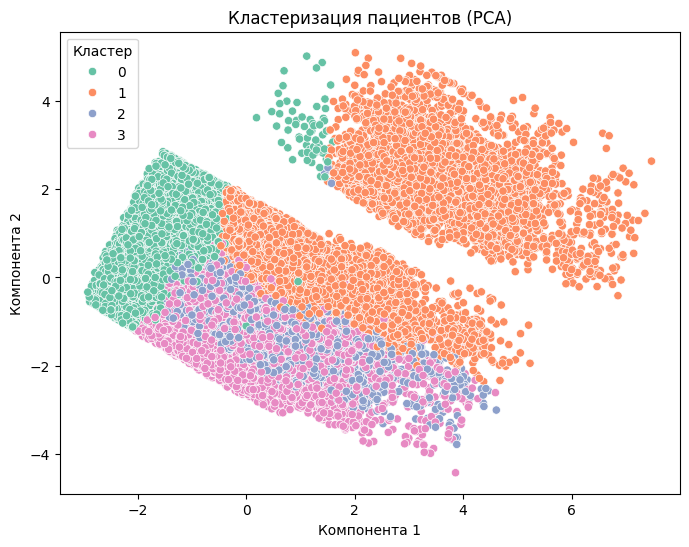

In [ ]:
# Визуализация кластеров с помощью PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['cluster'], palette='Set2')
plt.title('Кластеризация пациентов (PCA)')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.legend(title='Кластер')
plt.show()



Средние значения признаков по кластерам:
               age       bmi  HbA1c_level  blood_glucose_level  hypertension  \
cluster                                                                       
0       -1.240417 -1.224585     0.062293             0.050732      0.001377   
1        0.507427  0.421529     0.728646             0.637342      0.111948   
2        0.190439  0.268917     0.319539            -1.262207      0.065063   
3        0.239278  0.272948    -1.254056             0.161335      0.071787   

         heart_disease  diabetes  
cluster                           
0             0.000794  0.003865  
1             0.060848  0.157566  
2             0.035944  0.000165  
3             0.037193  0.000000  


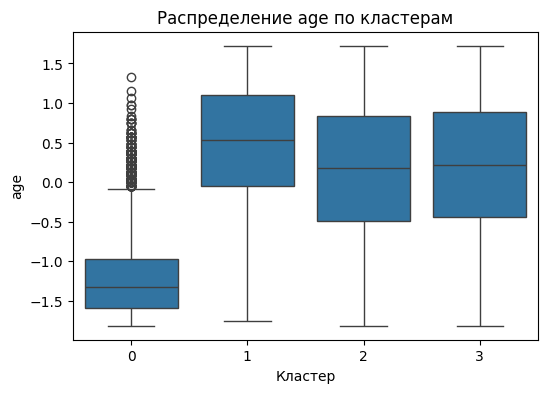

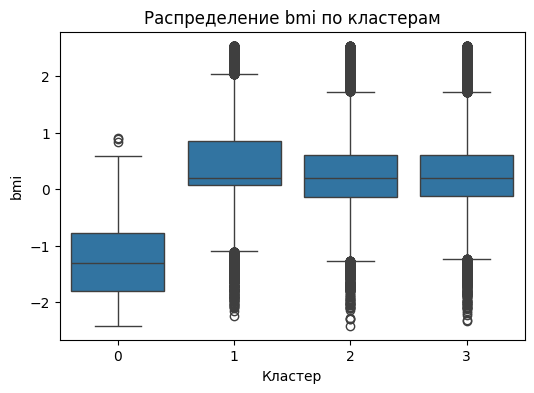

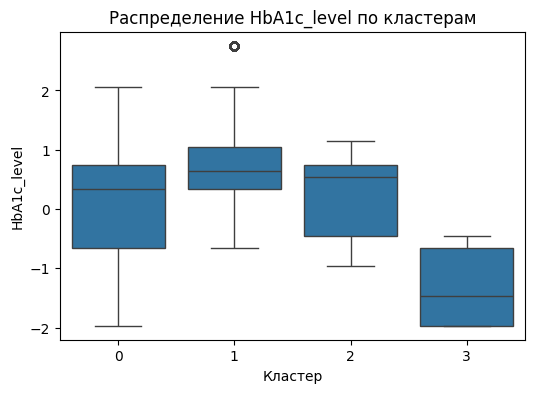

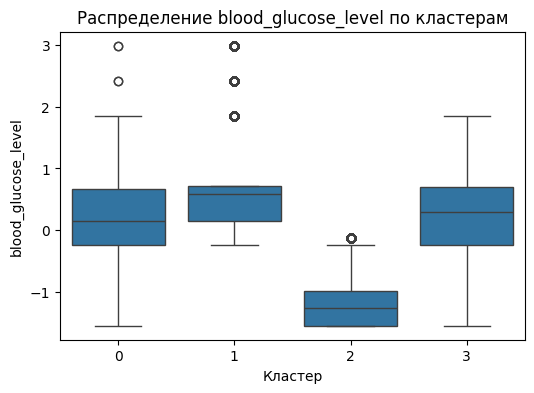

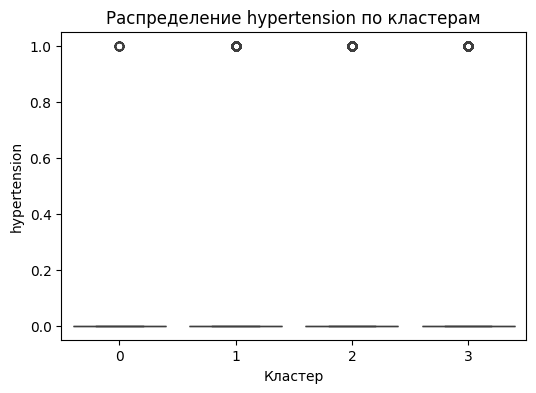

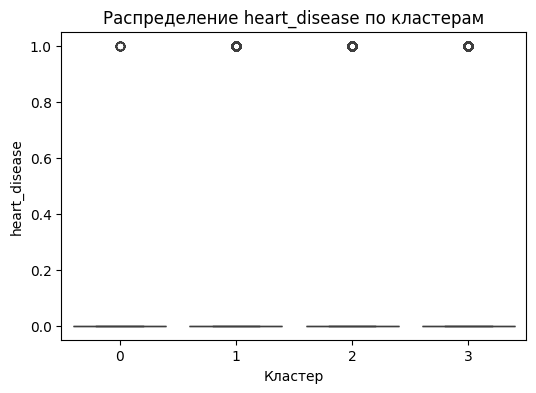

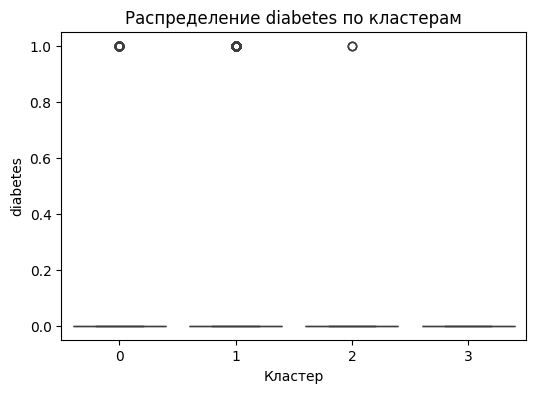

In [ ]:
# Анализ профилей кластеров
print("Средние значения признаков по кластерам:\n", data.groupby('cluster')[features_for_clustering].mean())

# Визуализация boxplot для сравнения признаков по кластерам
for feature in features_for_clustering:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster', y=feature, data=data)
    plt.title(f"Распределение {feature} по кластерам")
    plt.xlabel('Кластер')
    plt.ylabel(feature)
    plt.show()


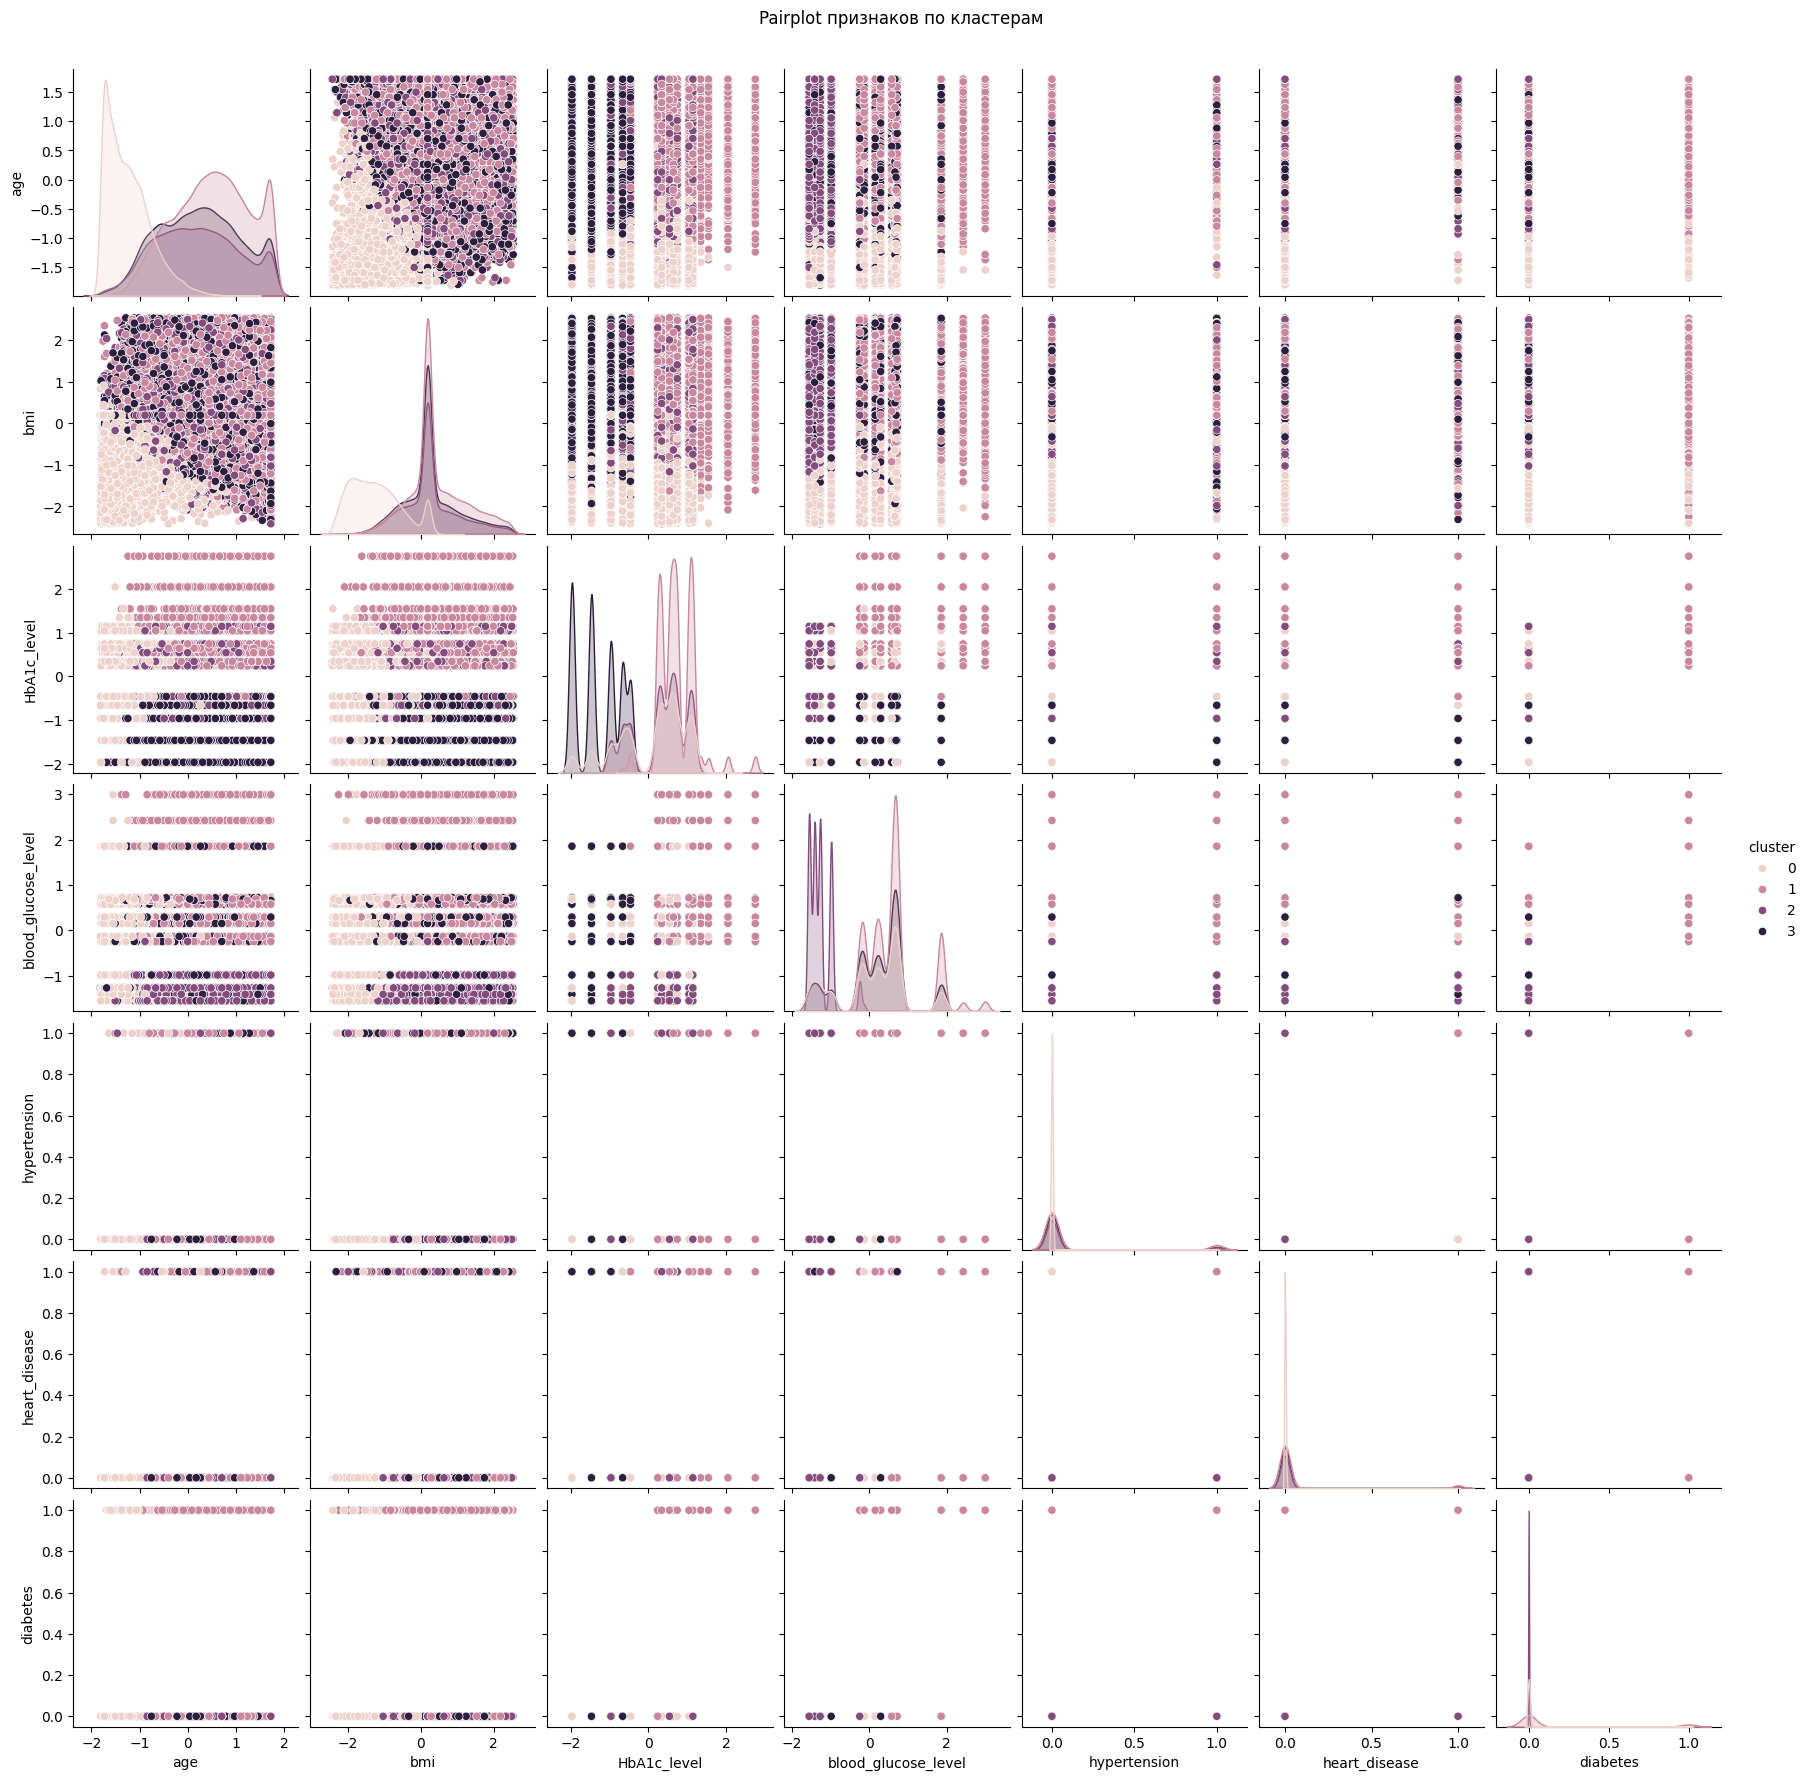

In [ ]:
# Pairplot для анализа пар признаков по сегментам
sns.pairplot(data, hue='cluster', vars=features_for_clustering)
plt.suptitle('Pairplot признаков по кластерам', y=1.02)
plt.show()